Resources used for completion of this task:

- Coursera. (n.d.). Medical Insurance Premium Prediction with Machine Learning [Online course].
  Retrieved February 14, 2025,
  from https://www.coursera.org/learn/medical-insurance-premium-prediction-with-machine-learning
- Coursera. (n.d.). Logistic Regression with NumPy and Python [Online course].
  Retrieved February 14, 2025,
  from https://www.coursera.org/learn/logistic-regression-numpy-python
- Liu, Y. (Hayden). (2020). Python machine learning by example: Unlock machine learning best
  practices with real-world use cases (3rd ed.). Packt Publishing.
- https://statisticsbyjim.com/regression/interpret-r-squared-regression/ [Online resource].
  Retrieved February 14, 2025
 - Kaggle https://www.kaggle.com/search?q=titanic [Online resource].
  Retrieved February 14, 2025

In [25]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [26]:
# Load the Titanic dataset from a CSV file into a pandas DataFrame
titanic_df = pd.read_csv('titanic.csv')

# Display the first five rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Display a summary of the DataFrame, including the number of non-null values, data types, and memory usage
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
# Remove the "Cabin" column from the DataFrame to simplify the dataset
titanic_df.drop("Cabin", axis=1, inplace=True)

In [29]:
# Count the number of missing (NaN) values in the "Age" column
titanic_df['Age'].isnull().sum()

# Fill missing values in the "Age" column with the mean age and convert to integer type
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].mean()).astype(int)
#titanic_df['Age'].astype(int)
#titanic_df

In [30]:
# Display the unique values in the "Sex" column to check the different categories of gender in the dataset
titanic_df["Sex"].unique()


array(['male', 'female'], dtype=object)

In [31]:
# Convert the categorical "Sex" column into numerical dummy variables (one-hot encoding)
# This creates separate columns for "Sex_female" and "Sex_male", with binary values (0 or 1)
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])

# Ensure the dummy variable columns are explicitly stored as integers
titanic_df['Sex_female'] = titanic_df['Sex_female'].astype(int)
titanic_df['Sex_male'] = titanic_df['Sex_male'].astype(int)

titanic_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29,1,2,W./C. 6607,23.4500,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,C,0,1


In [32]:
# Convert the categorical "Embarked" column into numerical dummy variables (one-hot encoding)
# This creates separate columns for "Embarked_C", "Embarked_Q", and "Embarked_S", with binary values (0 or 1)
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])

# Ensure the dummy variable columns are explicitly stored as integers
titanic_df['Embarked_C'] = titanic_df['Embarked_C'].astype(int)
titanic_df['Embarked_Q'] = titanic_df['Embarked_Q'].astype(int)
titanic_df['Embarked_S'] = titanic_df['Embarked_S'].astype(int)

# Display the updated DataFrame
titanic_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29,1,2,W./C. 6607,23.4500,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,0,1,1,0,0


In [33]:
# Separate the features (X) and the target variable (y)
# "Survived" is the target column, so we drop it from X (features)
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

# Convert any remaining categorical variables in X into numerical dummy variables (one-hot encoding)
X = pd.get_dummies(X)


Select relevant variables from the data and split the data into a training,
development, and test set.

In [34]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into a training set (60%) and a development (validation) set (20%)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Print the shape of each dataset split to verify the distribution
print("Training data:",X_train.shape, y_train.shape)
print("Development data:", X_dev.shape, y_dev.shape)
print("Test data:",X_test.shape, y_test.shape)

Training data: (534, 1583) (534,)
Development data: (178, 1583) (178,)
Test data: (179, 1583) (179,)


Using the training set, build and train a decision tree classiﬁer without
imposing any restrictions on its depth. Once the model is trained, plot the
tree diagram to visualise how it makes decisions.

Performance without pruning - Training Accuracy: 1.0000
Performance without pruning - Test Accuracy: 0.7989
At depth: 30


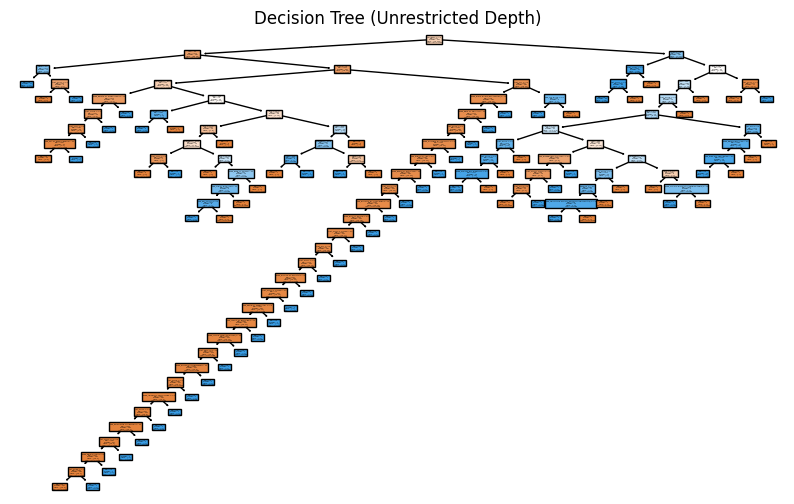

In [35]:
# Create a Decision Tree Classifier without any depth restriction (unpruned tree)
unpruned = DecisionTreeClassifier(max_depth=None, random_state=49)

# Train the model using the training data
unpruned.fit(X_train, y_train)

# Evaluate the model on the training set
train_accuracy = unpruned.score(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = unpruned.score(X_test, y_test)

# Print the training and test accuracy
print(f"Performance without pruning - Training Accuracy: {train_accuracy:.4f}")
print(f"Performance without pruning - Test Accuracy: {test_accuracy:.4f}")

# Print the maximum depth of the decision tree
print(f"At depth: {unpruned.tree_.max_depth}")

# Visualize the decision tree structure
plt.figure(figsize=(10, 6))
plot_tree(unpruned, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree (Unrestricted Depth)")
plt.show()

Compute and report the accuracy of your model on the development set.

In [36]:
# Print the updated shape of the data splits for training, development, and test sets
print(f"Updated Training data: {X_train.shape, y_train.shape}")
print(f"Development data: {X_dev.shape, y_dev.shape}")
print(f"Test data: {X_test.shape, y_test.shape}")

# Create and train the model with a max depth of 10 to prevent overfitting
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Compute and print accuracies for training, development, and test sets
train_accuracy = model.score(X_train, y_train)
dev_accuracy = model.score(X_dev, y_dev)
test_accuracy = model.score(X_test, y_test)

# Print the results with the accuracies rounded to 4 decimal places
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Development Accuracy: {dev_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Updated Training data: ((534, 1583), (534,))
Development data: ((178, 1583), (178,))
Test data: ((179, 1583), (179,))
Training Accuracy: 0.9513
Development Accuracy: 0.8315
Test Accuracy: 0.8101


In [37]:
# Create a Decision Tree Classifier without any depth restriction (max_depth=None), which allows the tree to grow fully
unpruned = DecisionTreeClassifier(max_depth=None, random_state=42)

# Train the model using the training data
unpruned.fit(X_train, y_train)

# Print the model's performance (accuracy) on the training set
print("Performance without pruning:", unpruned.score(X_train, y_train))

# Print the accuracy of the model on the test set to evaluate how well it generalizes
print("Accuracy on test set:", unpruned.score(X_test, y_test))

# Print the maximum depth of the unpruned decision tree to understand how deep the tree grew
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 1.0
Accuracy on test set: 0.8044692737430168
At depth: 30


Train your decision tree model using different values of max_depth from 2 to
10. For each value of max_depth, visualise the decision tree and record the
accuracy for both the training and development datasets.

Depth = 2:
  Training Accuracy: 0.7959
  Development Accuracy: 0.8258
----------------------------------------


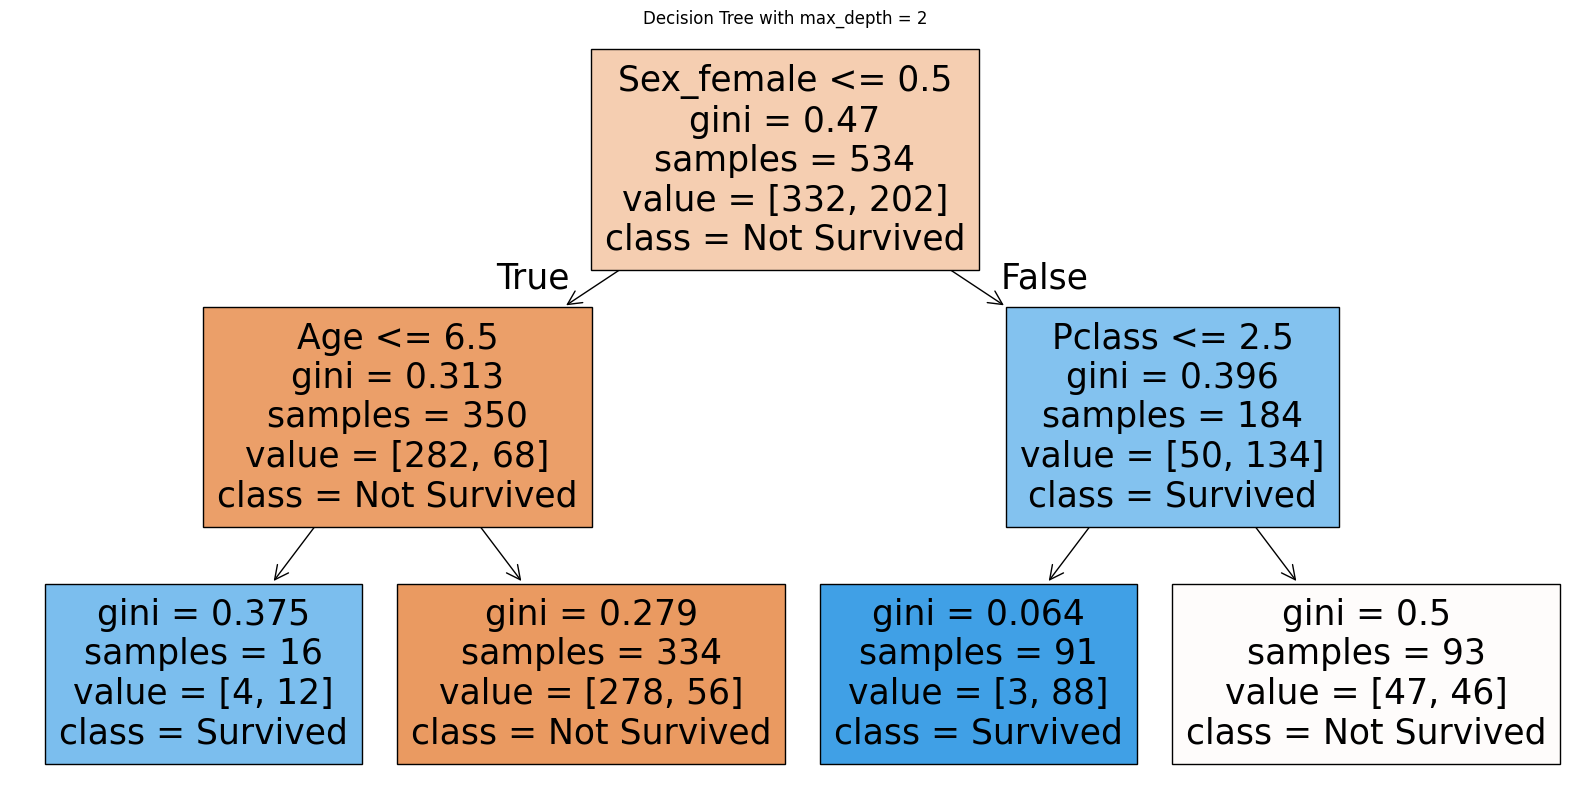

Depth = 3:
  Training Accuracy: 0.8315
  Development Accuracy: 0.8483
----------------------------------------


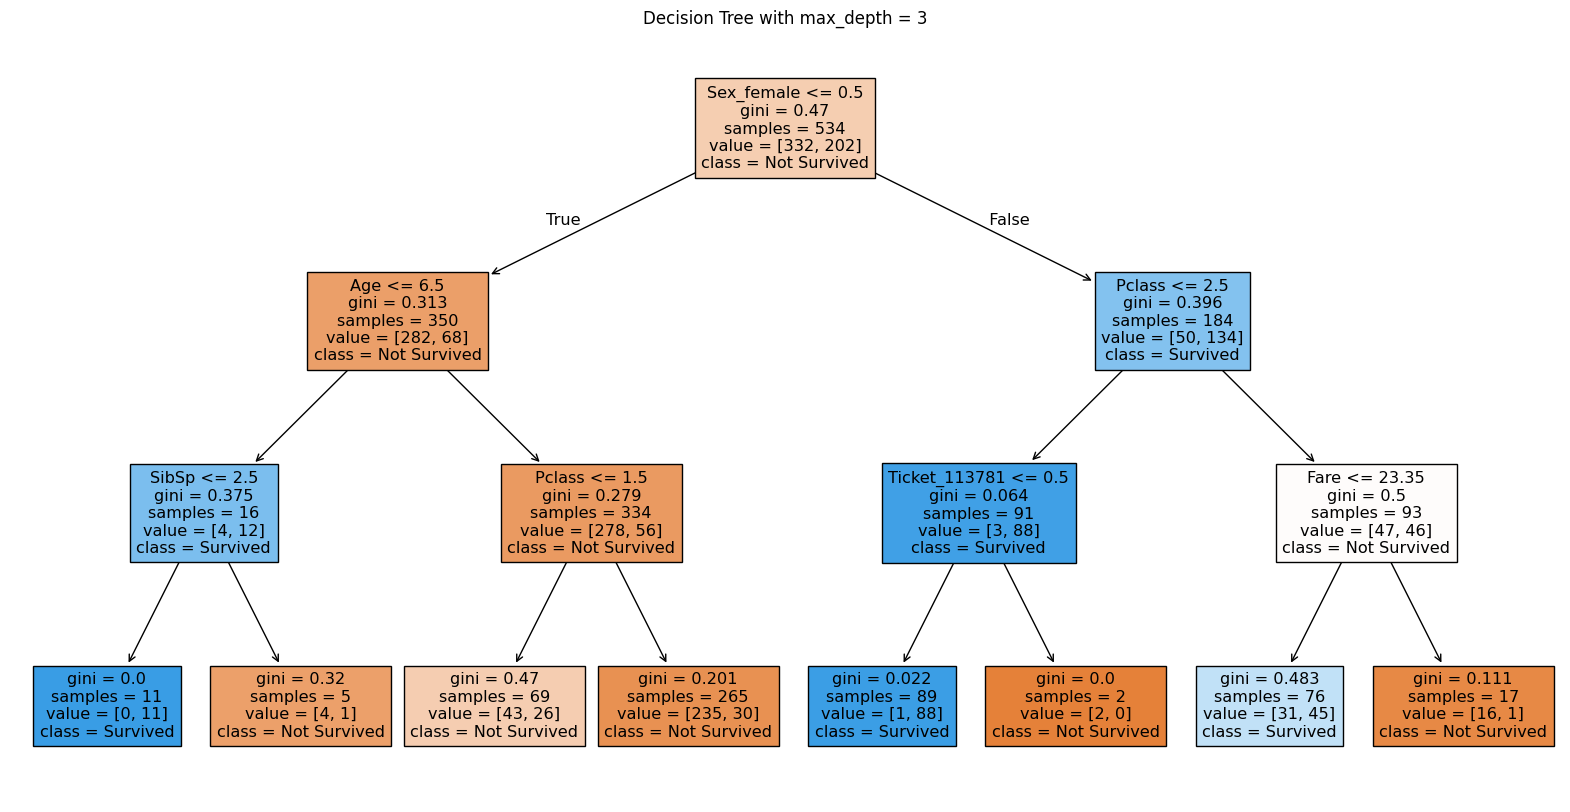

Depth = 4:
  Training Accuracy: 0.8483
  Development Accuracy: 0.8427
----------------------------------------


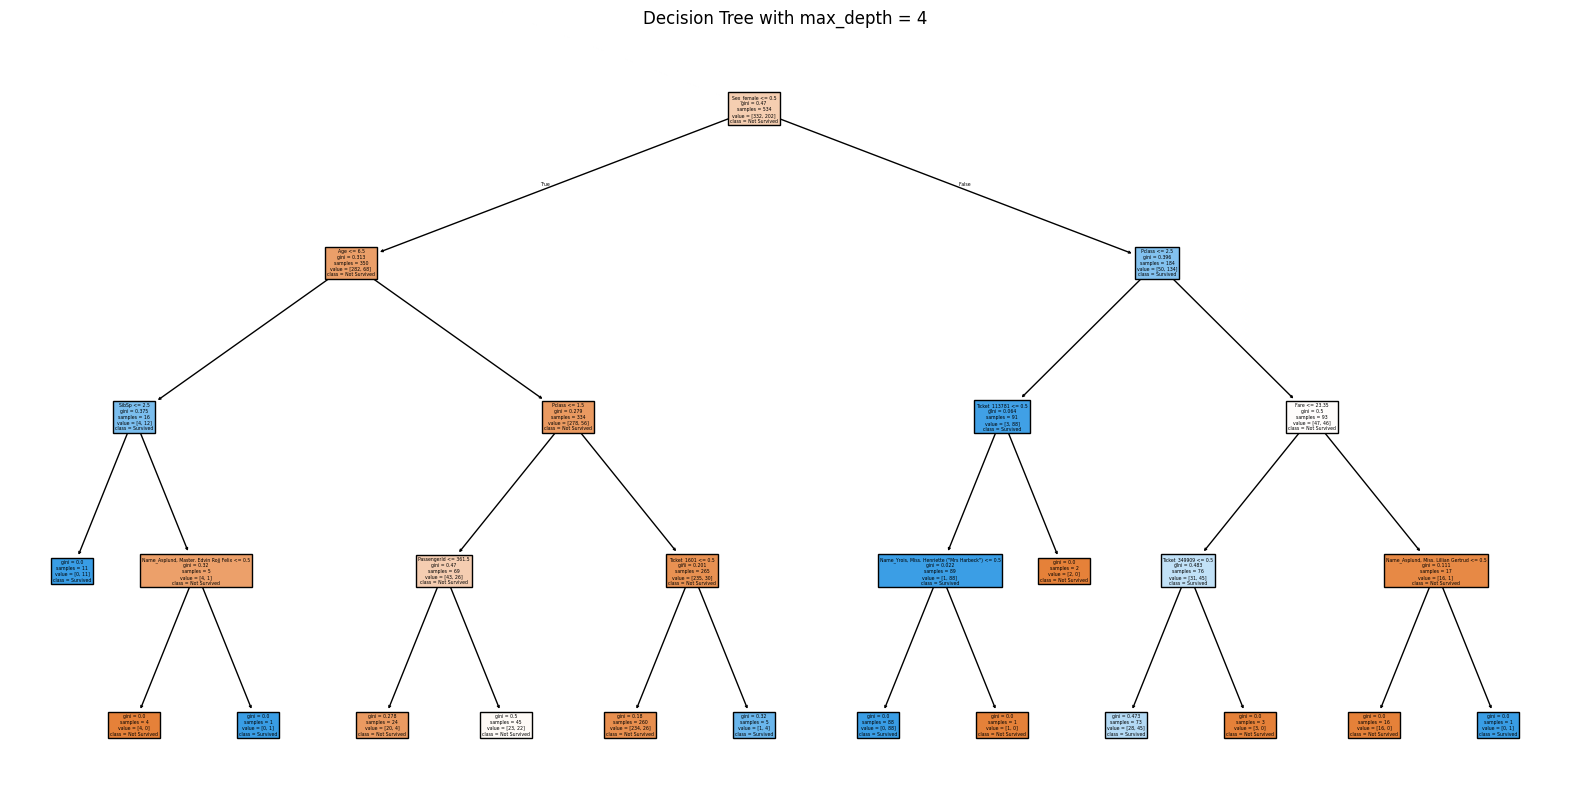

Depth = 5:
  Training Accuracy: 0.8689
  Development Accuracy: 0.8258
----------------------------------------


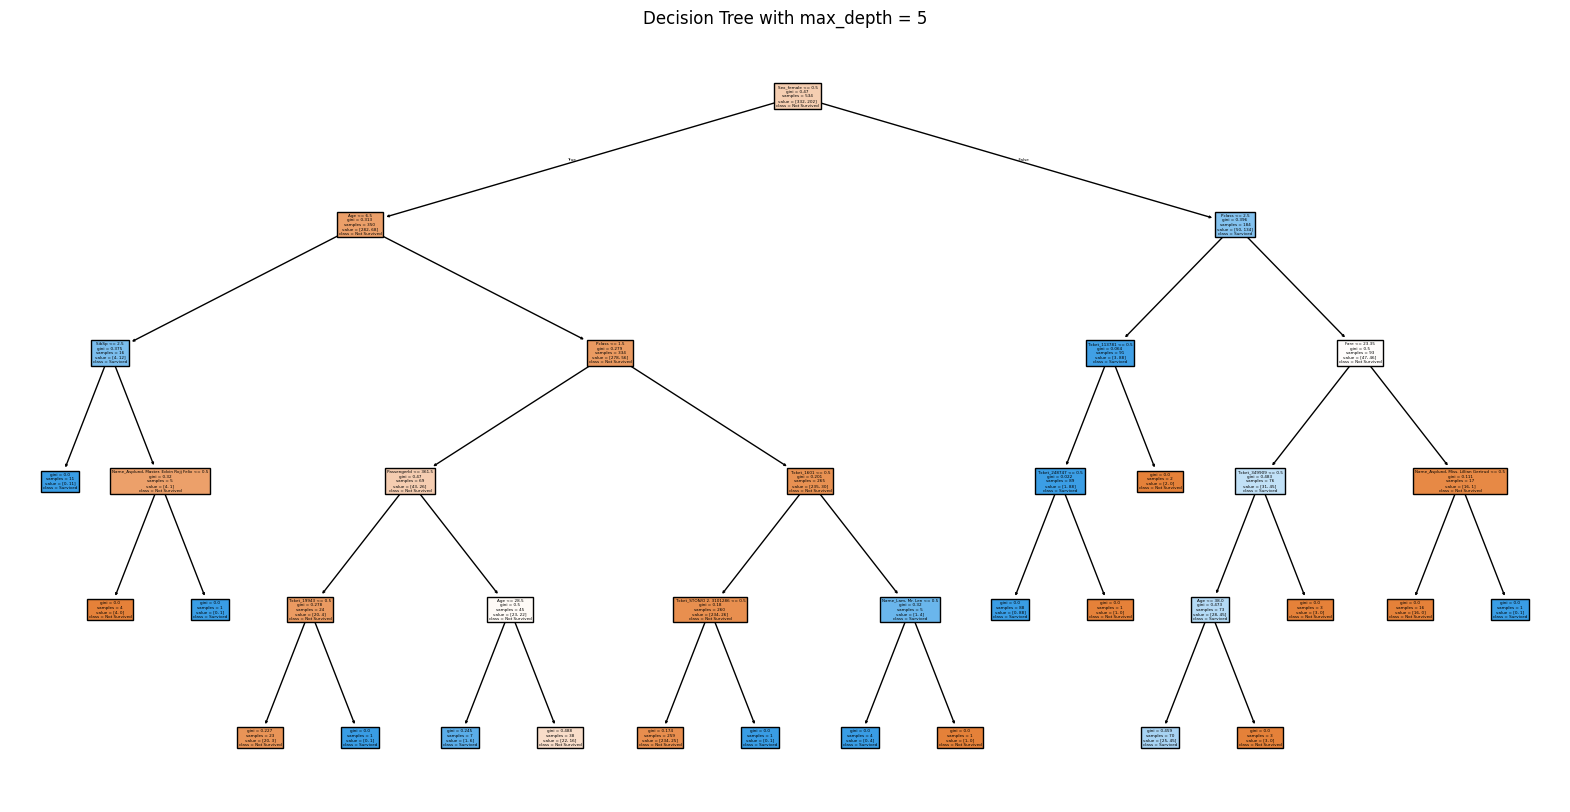

Depth = 6:
  Training Accuracy: 0.8801
  Development Accuracy: 0.8146
----------------------------------------


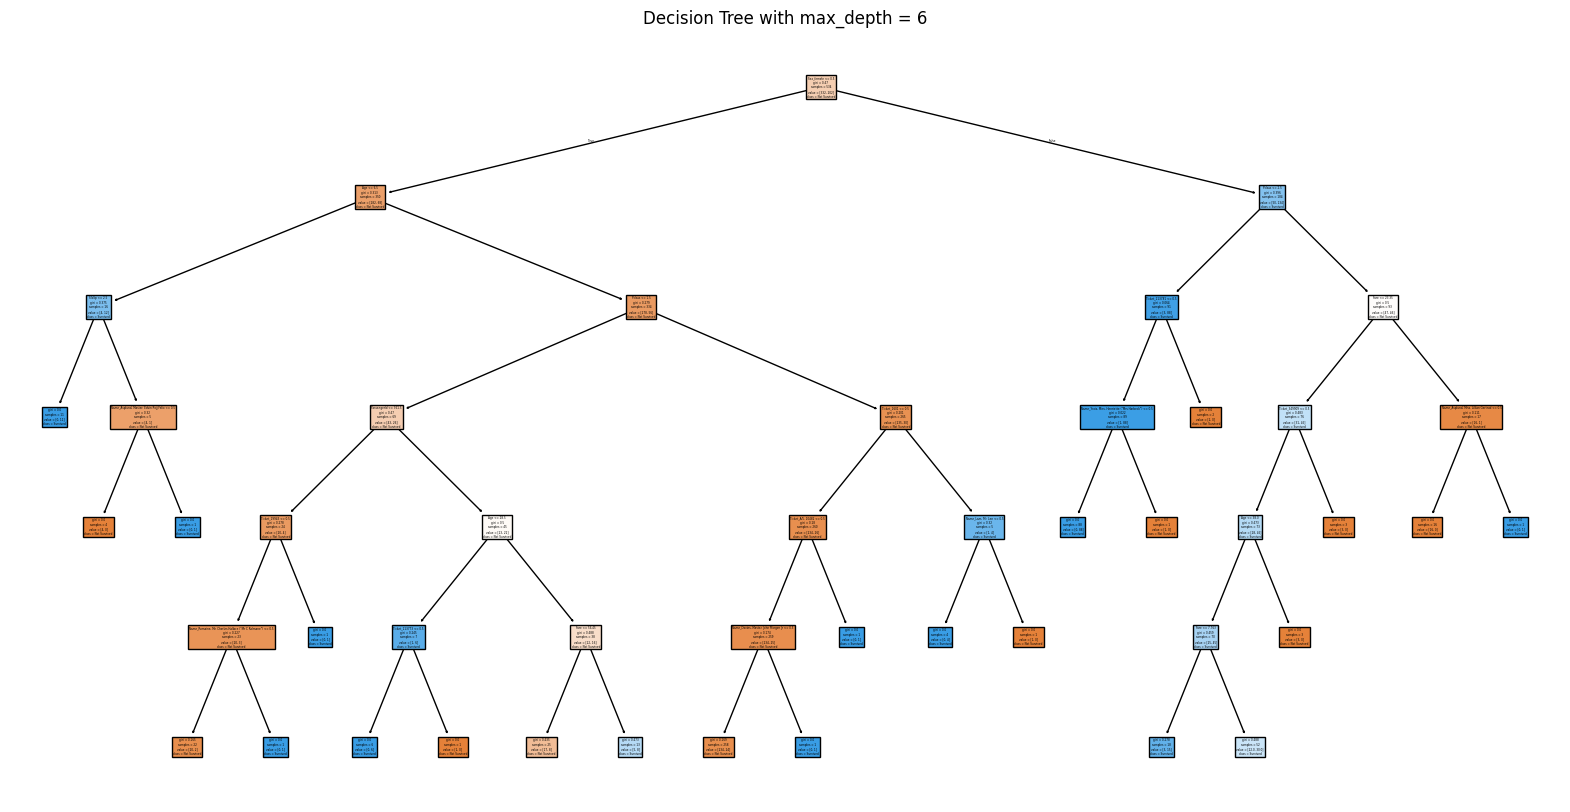

Depth = 7:
  Training Accuracy: 0.8970
  Development Accuracy: 0.8202
----------------------------------------


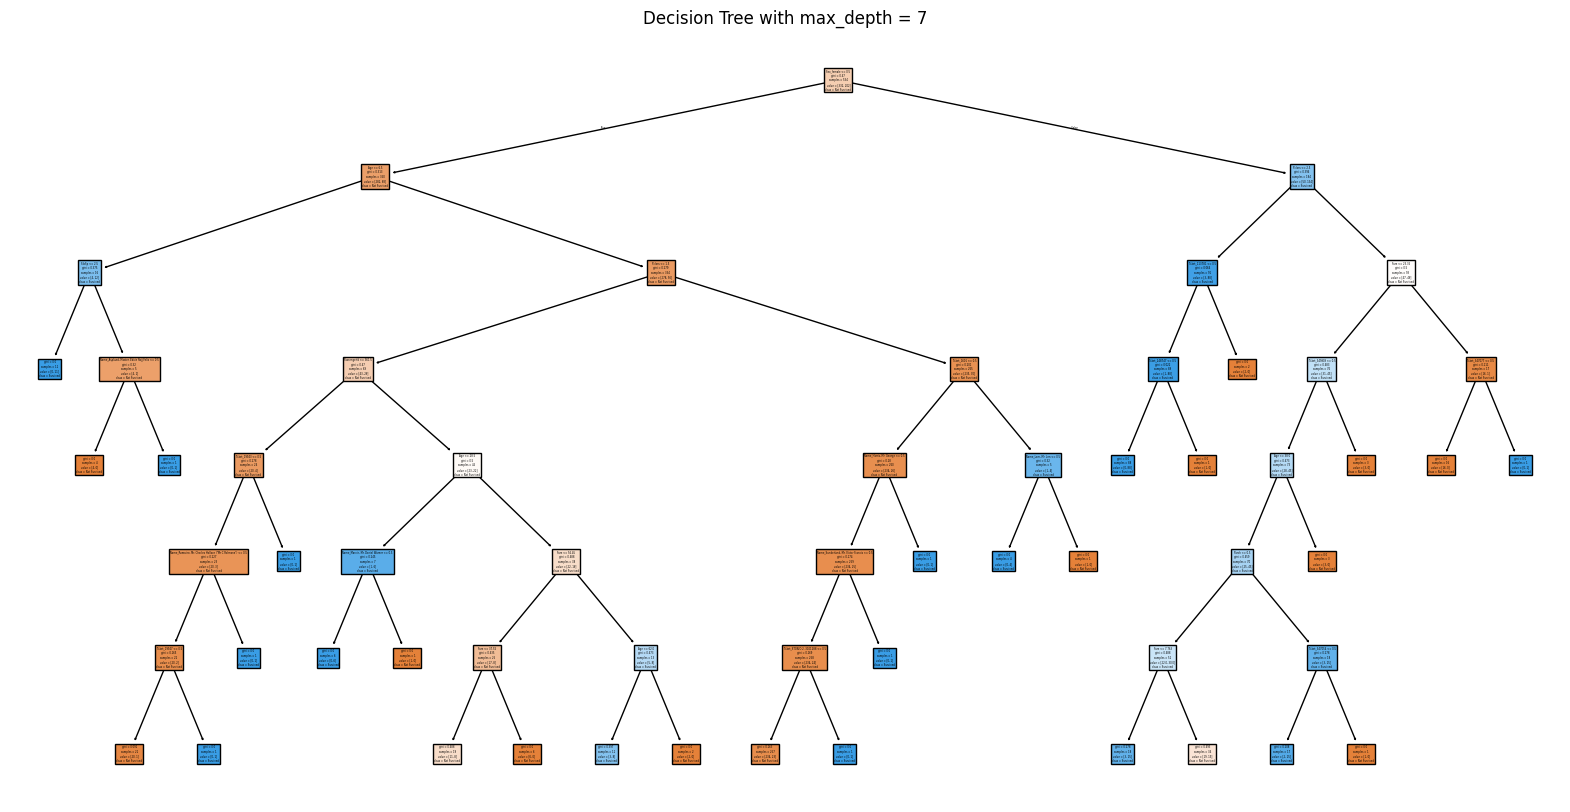

Depth = 8:
  Training Accuracy: 0.9176
  Development Accuracy: 0.8202
----------------------------------------


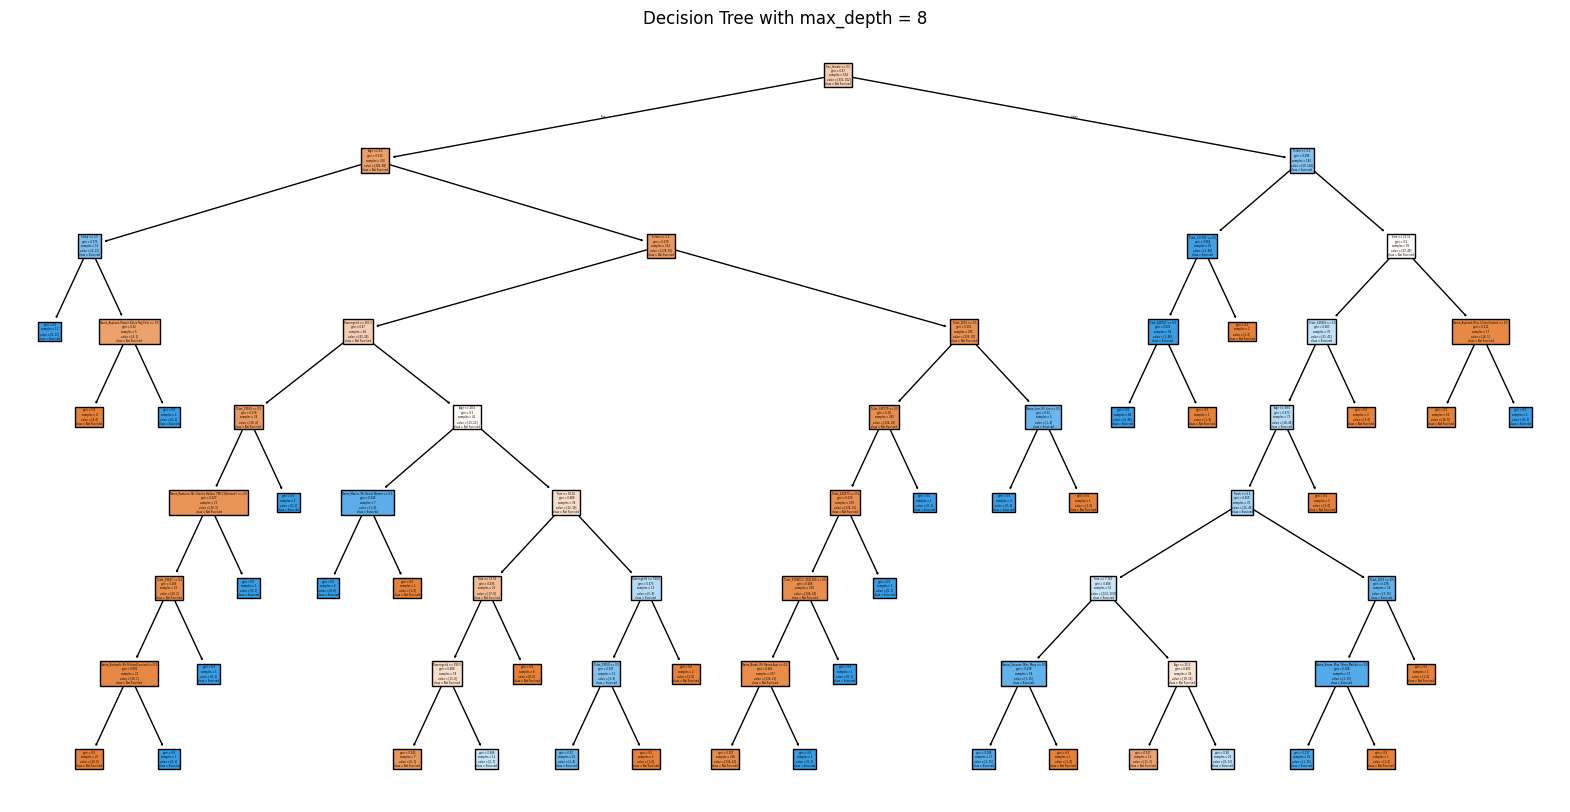

Depth = 9:
  Training Accuracy: 0.9382
  Development Accuracy: 0.8371
----------------------------------------


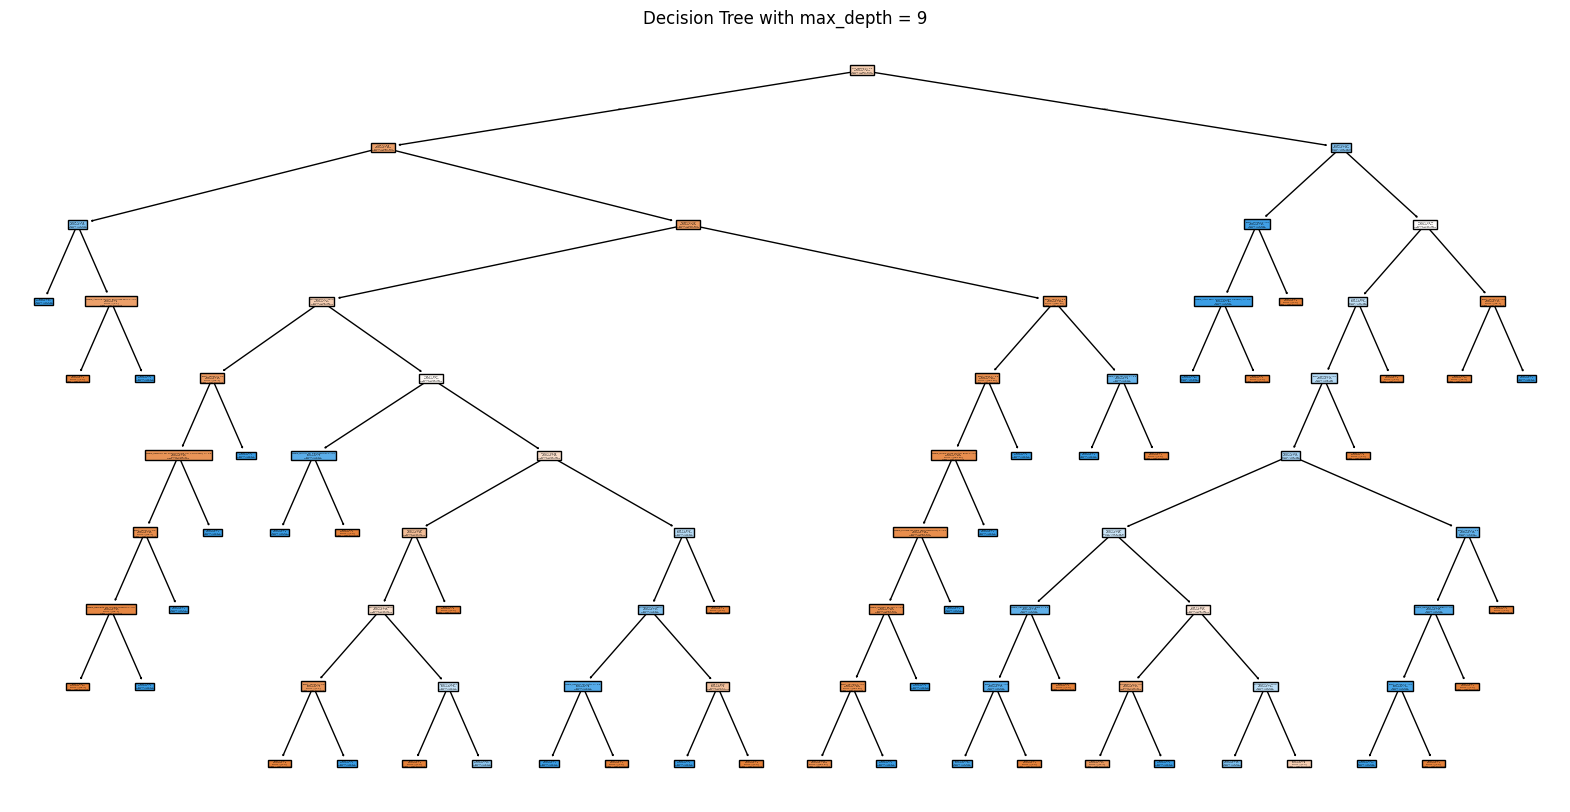

Depth = 10:
  Training Accuracy: 0.9513
  Development Accuracy: 0.8315
----------------------------------------


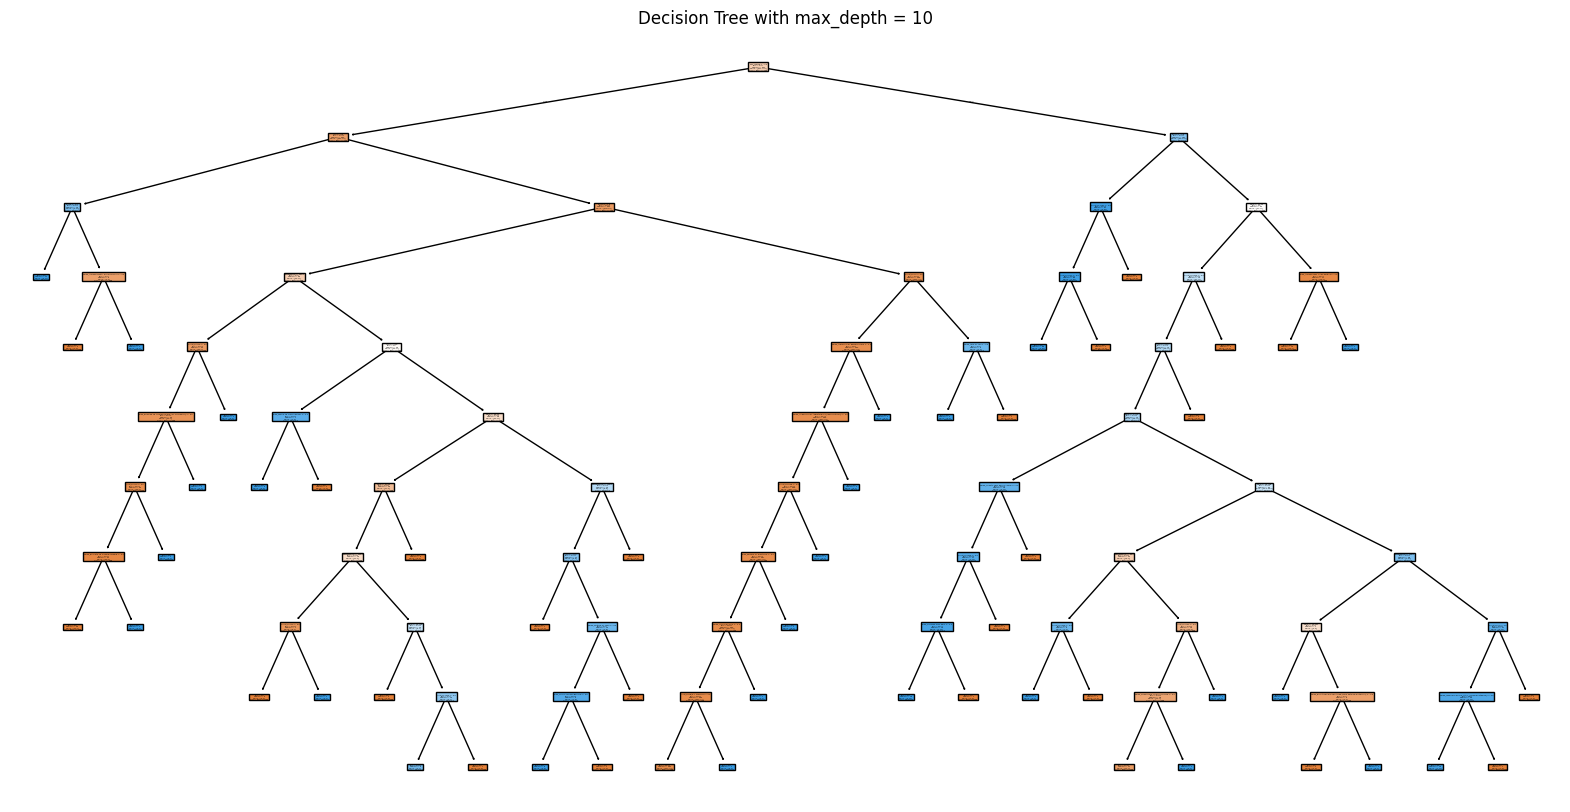

In [38]:
# Define a range of depths to test for pruning (from 2 to 10)
pruned_depths = range(2, 11)

# Initialize lists to store training and development scores for each depth
train_scores = []
dev_scores = []

# Loop through each depth value in the range
for depth in pruned_depths:
    # Create and train a Decision Tree model with the current max_depth
    pruned = DecisionTreeClassifier(max_depth=depth, random_state=42)
    pruned.fit(X_train, y_train)

    # Compute the accuracy for the training set and the development set (validation set)
    train_score = pruned.score(X_train, y_train)
    dev_score = pruned.score(X_dev, y_dev)

     # Store the accuracies for each depth in the lists
    train_scores.append(train_score)
    dev_scores.append(dev_score)

    # Print the training and development accuracy for the current depth
    print(f"Depth = {depth}:")
    print(f"  Training Accuracy: {train_score:.4f}")
    print(f"  Development Accuracy: {dev_score:.4f}")
    print("-" * 40)

    # Visualize the decision tree structure for the current depth
    plt.figure(figsize=(20, 10))
    plot_tree(pruned, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
    plt.title(f"Decision Tree with max_depth = {depth}")
    plt.show()

Tree interpretation on depth 2

Root Node Split: Sex_female <= 0.5 (Gender)
•	Gini Impurity: 0.47 (moderate impurity).

•	Samples: 534 (332 "Not Survived" vs. 202 "Survived").

•	Split Logic:

    True (Male): 350 samples.
    False (Female): 184 samples.
________________________________________
Male Subtree (True Branch): Age <= 6.5
•	Gini Impurity: 0.313.

•	Samples: 350 (282 "Not Survived" vs. 68 "Survived").

•	Key Observations:

    1.	Age ≤ 6.5 (Children):

        	16 samples (4 "Not Survived", 12 "Survived").

        	Survival rate: 75% (young boys had higher survival chances).

    2.	Age > 6.5 (Adult Males):

        	334 samples (278 "Not Survived", 56 "Survived").

        	Survival rate: 16.8% (most adult males perished).
________________________________________

Female Subtree (False Branch): Pclass <= 2.5 (Passenger Class)

•	Gini Impurity: 0.396.

•	Samples: 184 (50 "Not Survived" vs. 134 "Survived").

•	Key Observations:

    1.	Pclass ≤ 2.5 (1st/2nd Class):

        	91 samples (3 "Not Survived", 88 "Survived").

        	Survival rate: 96.7% (nearly all higher-class females survived).

    2.	Pclass > 2.5 (3rd Class):

        	93 samples (47 "Not Survived", 46 "Survived").

        	Survival rate: 49.5% (split nearly even, slight edge to "Not Survived").

Primary Drivers of Survival:

Gender: Females had significantly higher survival rates.

Age: Male children (≤6.5 years) were prioritized.

Class: Female survival heavily depended on socioeconomic status (1st/2nd class vs. 3rd class).

Plot a line graph comparing your training accuracies with your
development accuracies on the same graph. Then, analyse the shapes of
the lines and explain what these shapes indicate about your model's
performance.

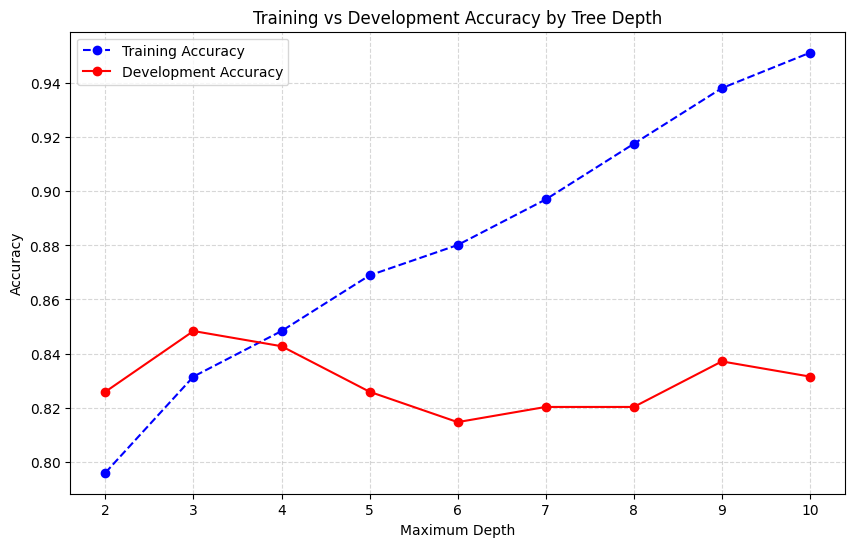

In [39]:
#pruned_depths = range(2, 11)

#train_scores = []
#dev_scores = []

#for depth in pruned_depths:
 #   pruned = DecisionTreeClassifier(max_depth=depth, random_state=42)
  #  pruned.fit(X_train, y_train)

   # train_score = pruned.score(X_train, y_train)
    #dev_score = pruned.score(X_dev, y_dev)  # Use development dataset for accuracy computation

    #train_scores.append(train_score)
    #dev_scores.append(dev_score)

# Plot accuracy for each depth to visualize the performance
plt.subplots(figsize=(10, 6))

# Plot training accuracy with a dashed blue line and markers
plt.plot(pruned_depths, train_scores, label="Training Accuracy", marker='o', linestyle='dashed', color='blue')

# Plot development accuracy with a solid red line and markers
plt.plot(pruned_depths, dev_scores, label="Development Accuracy", marker='o', linestyle='solid', color='red')

# Set the labels for the axes and title for the plot
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.title("Training vs Development Accuracy by Tree Depth")

# Set the x-axis ticks to match the depths we are testing
plt.xticks(pruned_depths)

# Add gridlines to make the plot easier to read
plt.grid(True, linestyle='--', alpha=0.5)

# Display the legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()

Analysis of the shapes of the lines

 - If the training accuracy is much higher than the development accuracy, the model might be overfitting.

 - If both lines are close together, the model generalizes well.

 - A significant gap between the lines indicates poor generalization due to overfitting, while a low training accuracy with a similar dev accuracy may indicate underfitting.
 - In this case we can see a case of overfitting as the training accuracy is much higher as the depth increases its value

Based on the analysis of max_depth, select the optimal value for the ﬁnal
model. Train this ﬁnal model using the training set and report its accuracy
on the test set

In [40]:
# Based on previous analysis, select the optimal max_depth
optimal_depth = 4  # Assign the chosen optimal value

# Train the final model using the training set
final_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
final_model.fit(X_train, y_train)

# Report accuracy on the test set
final_test_accuracy = final_model.score(X_test, y_test)
print(f"Final Model Accuracy on Test Set (max_depth={optimal_depth}): {final_test_accuracy:.4f}")



Final Model Accuracy on Test Set (max_depth=4): 0.8045


Based on the analysis of max_depth, the optimal value appears to be around 3-4. This is where the development accuracy is highest in the "Training vs Development Accuracy by Tree Depth" plot, indicating the best generalization performance without overfitting.